In [44]:
import pandas as pd

# 파일 경로
file_path = '/content/sample_data/회귀트리_복합SCFI_CLI_2017.xlsx'

# 데이터 불러오기
data = pd.read_excel(file_path)
data.head()


,CLI_USA,SCFI_C
0,100.7090,1174.866
1,100.7202,1069.362
2,100.7613,969.145
3,100.8148,1078.462
4,100.8649,1137.112


In [45]:
# 중복 데이터 확인
duplicates = data.duplicated().sum()

# 중복 데이터 제거
data_cleaned = data.drop_duplicates()

# 중복 데이터 수 확인
duplicates, data_cleaned.shape


(0, (45, 2))

# 도표 19-3. 의사결정나무의 예측 결과 그래프와 회귀트리 구조 시각화

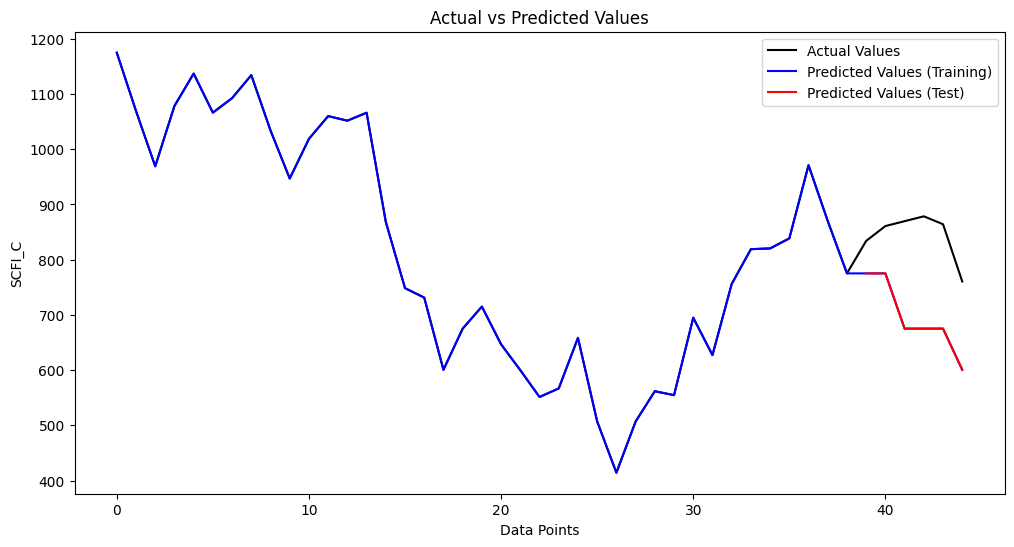

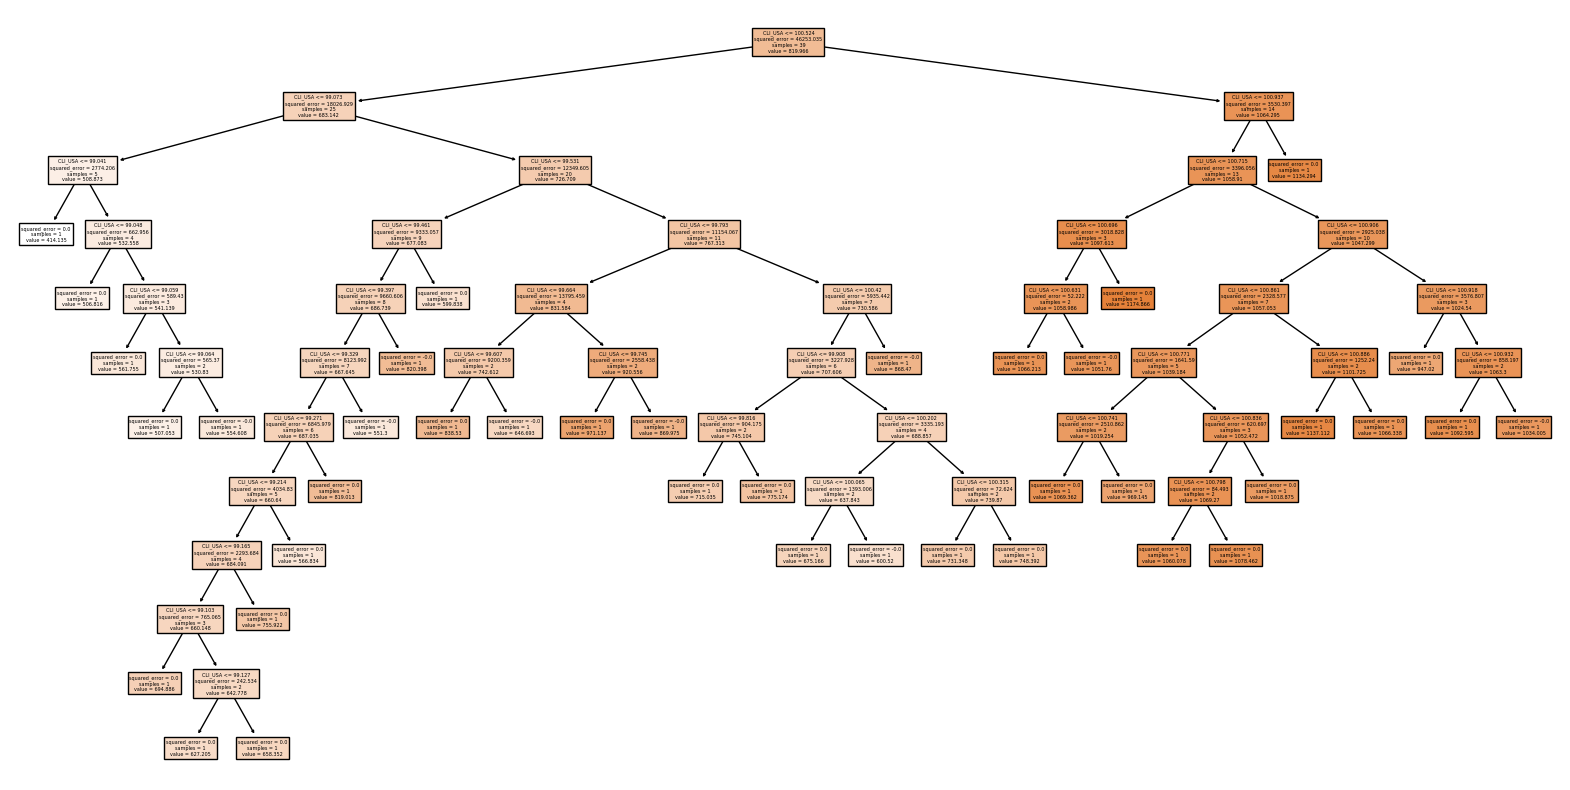

158.8457269916317

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# 데이터 분리 (마지막 6개를 테스트 데이터로 사용)
train_data = data_cleaned[:-6]
test_data = data_cleaned[-6:]

# 훈련 데이터와 테스트 데이터를 X와 y로 분리
X_train = train_data.drop('SCFI_C', axis=1)
y_train = train_data['SCFI_C']
X_test = test_data.drop('SCFI_C', axis=1)
y_test = test_data['SCFI_C']

# 회귀트리 모델 구축 및 훈련
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test = regressor.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# 전체 데이터에 대한 예측값 (훈련 및 테스트)
y_pred_total = regressor.predict(data_cleaned.drop('SCFI_C', axis=1))

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['SCFI_C'], 'k-', label='Actual Values')
plt.plot(y_pred_total, 'b-', label='Predicted Values (Training)')
plt.plot(range(len(data_cleaned)-6, len(data_cleaned)), y_pred_test, 'r-', label='Predicted Values (Test)')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("SCFI_C")
plt.show()

# 회귀트리 시각화
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, feature_names=['CLI_USA'], filled=True)
plt.show()

rmse


# 도표 19-4. 의사결정나무의 마지막 데이터 예측을 위한 경로 노드

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


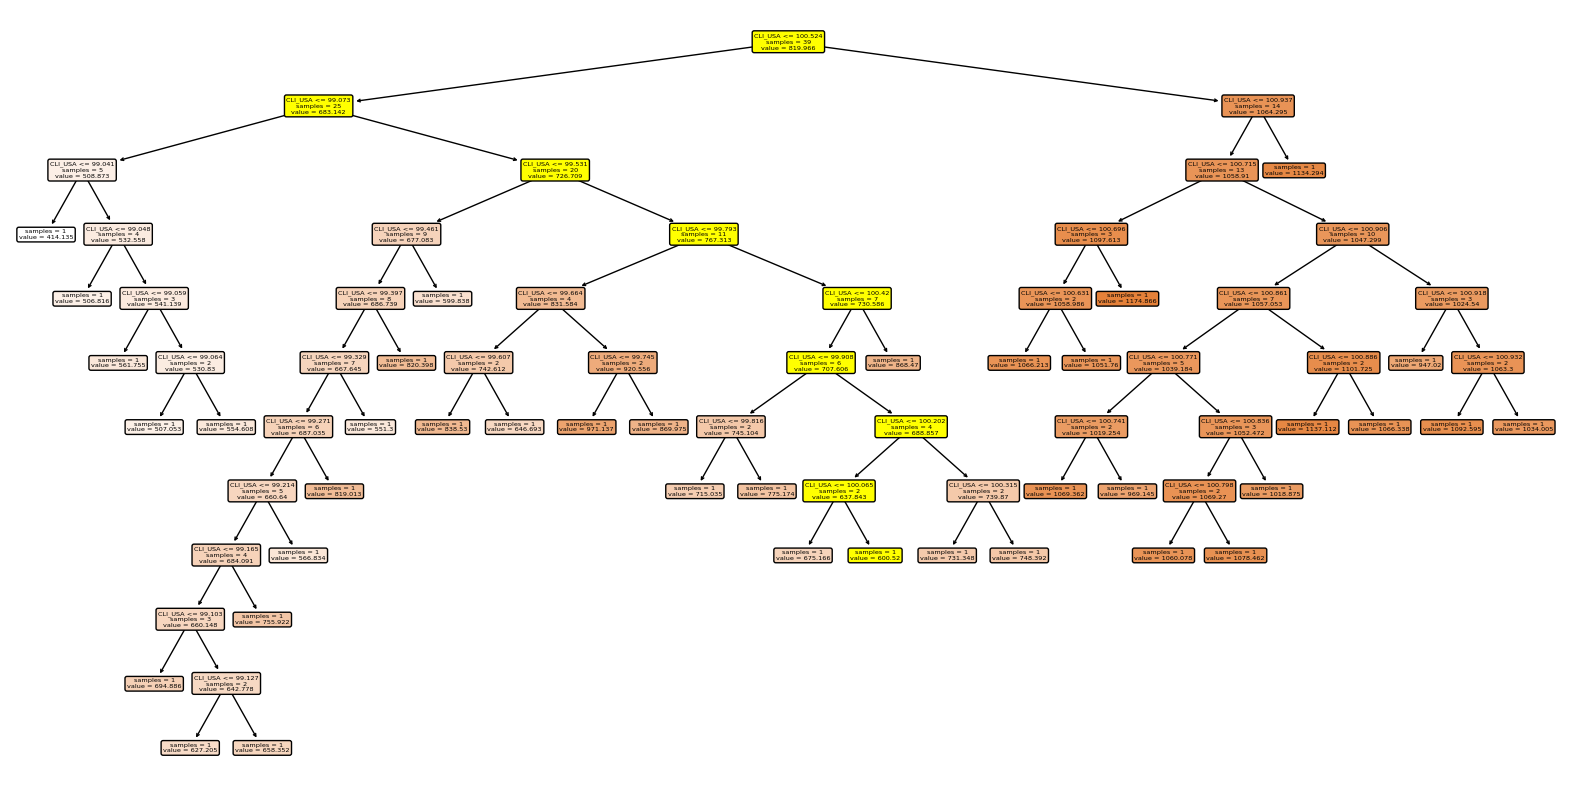

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def find_decision_path(tree_model, data_point):
    """
    Given a decision tree model and a data point, find the decision path
    taken for predicting the data point.

    Args:
    tree_model (DecisionTreeRegressor): The trained decision tree model.
    data_point (numpy array): The data point for which to find the decision path.

    Returns:
    list of int: Node indices in the decision path.
    """
    # Get the decision path for the data point
    decision_path = tree_model.decision_path(data_point).toarray()
    node_indices = np.where(decision_path[0] == 1)[0]

    return node_indices

# 마지막 테스트 데이터 포인트에 대한 의사결정 경로 찾기
last_test_data_point = X_test.iloc[-1].values.reshape(1, -1)
decision_path_nodes = find_decision_path(regressor, last_test_data_point)

# 회귀트리 시각화 - 경유한 노드를 강조하여 표시
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=['CLI_USA'], filled=True, impurity=False, rounded=True)
ax = plt.gca()

# 경유한 노드를 노란색으로 강조
for node in decision_path_nodes:
    bbox = ax.texts[node].get_bbox_patch()
    bbox.set_facecolor("yellow")
    bbox.set_edgecolor("black")

plt.show()


# 도표 19-4. 의사결정나무의 마지막 데이터 예측을 위한 경로 노드

In [49]:
def extract_decision_path(tree_model, decision_path):
    """
    Extract the decision path details from a decision tree model for a specific data point.

    Args:
    tree_model (DecisionTreeRegressor): The trained decision tree model.
    decision_path (list): List of node indices in the decision path.

    Returns:
    str: A string representation of the decision path.
    """
    children_left = tree_model.tree_.children_left
    children_right = tree_model.tree_.children_right
    feature = tree_model.tree_.feature
    threshold = tree_model.tree_.threshold

    # Initialize the path description
    decision_path_description = []

    for node_id in decision_path:
        # Check if this is a leaf node
        if children_left[node_id] == children_right[node_id]:
            value = tree_model.tree_.value[node_id]
            decision_path_description.append(f"Node {node_id}: Leaf node. Predicted value = {value}")
        else:
            # Decision rule
            if node_id == 0:
                # Root node
                decision_path_description.append(f"Node {node_id}: Root. Rule: {feature_names[feature[node_id]]} <= {threshold[node_id]}")
            else:
                # Intermediate node
                decision_path_description.append(f"Node {node_id}: Rule: {feature_names[feature[node_id]]} <= {threshold[node_id]}")

    return decision_path_description

# Extracting the decision path for the last test data point
feature_names = ['CLI_USA']
decision_path_description = extract_decision_path(regressor, decision_path_nodes)
decision_path_description



['Node 0: Root. Rule: CLI_USA <= 100.52425003051758',
 'Node 1: Rule: CLI_USA <= 99.07324981689453',
 'Node 11: Rule: CLI_USA <= 99.53084182739258',
 'Node 29: Rule: CLI_USA <= 99.7930908203125',
 'Node 37: Rule: CLI_USA <= 100.4197998046875',
 'Node 38: Rule: CLI_USA <= 99.90811157226562',
 'Node 42: Rule: CLI_USA <= 100.20190048217773',
 'Node 43: Rule: CLI_USA <= 100.0645751953125',
 'Node 45: Leaf node. Predicted value = [[600.52]]']

In [27]:
# 경로에 있는 노드 번호 출력
decision_path_nodes


array([ 0,  1, 11, 29, 37, 38, 42, 43, 45])

# 도표 19-5. 의사결정나무와 회귀분석의 예측결과 그래프

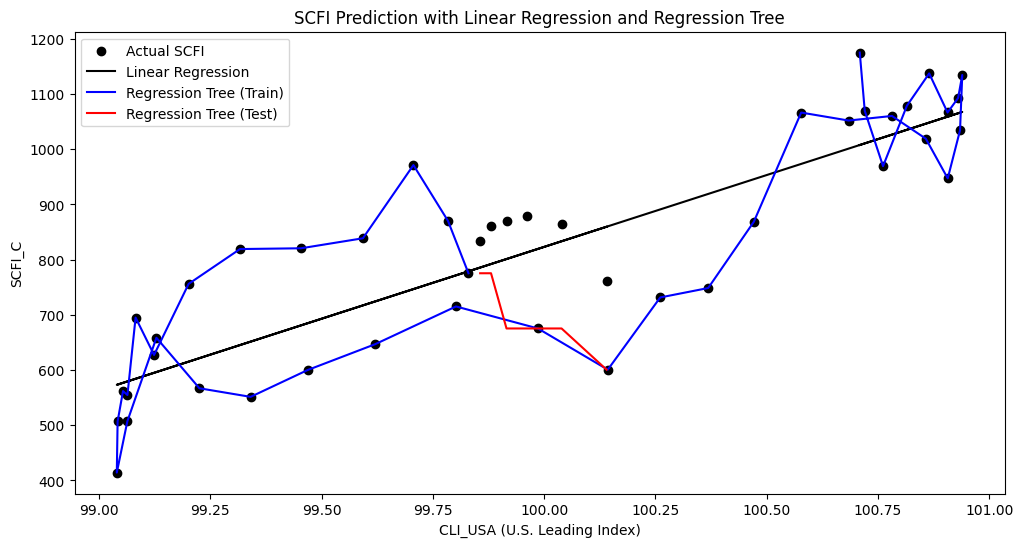

In [50]:
# 선형회귀 모델을 사용한 전체 데이터에 대한 예측값
y_pred_total_linear = linear_regressor.predict(data_cleaned.drop('SCFI_C', axis=1))

# 회귀트리 모델을 사용한 훈련 데이터에 대한 예측값
y_pred_train_tree = regressor.predict(X_train)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# SCFI 실적
plt.scatter(data_cleaned['CLI_USA'], data_cleaned['SCFI_C'], color='black', label='Actual SCFI')

# 선형회귀선
plt.plot(data_cleaned['CLI_USA'], y_pred_total_linear, 'k-', label='Linear Regression')

# 회귀트리로 예측한 훈련 데이터
plt.plot(X_train['CLI_USA'], y_pred_train_tree, 'b-', label='Regression Tree (Train)')

# 회귀트리로 예측한 테스트 데이터
plt.plot(X_test['CLI_USA'], y_pred_test, 'r-', label='Regression Tree (Test)')

# 그래프 설정
plt.xlabel("CLI_USA (U.S. Leading Index)")
plt.ylabel("SCFI_C")
plt.title("SCFI Prediction with Linear Regression and Regression Tree")
plt.legend()
plt.show()


(참조용) 선형회귀와 회귀트리

In [51]:
from sklearn.linear_model import LinearRegression

# 선형회귀 모델 생성 및 훈련
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test_linear = linear_regressor.predict(X_test)

# 예측 결과 확인
y_pred_test_linear


array([785.51358939, 791.86753528, 800.91819889, 812.81655475,
       833.10961587, 859.42604068])

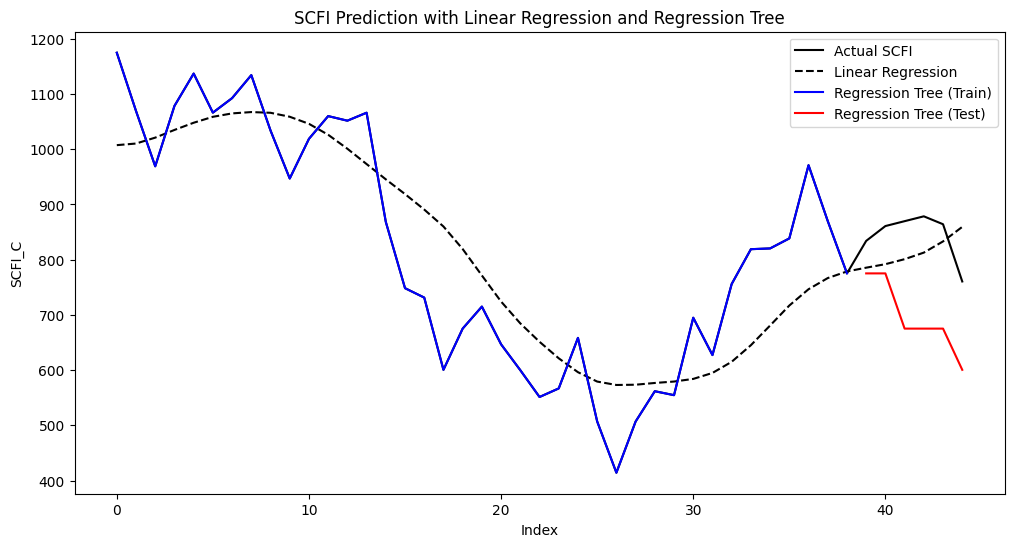

In [52]:
# 그래프 그리기 (X축을 인덱스로)
plt.figure(figsize=(12, 6))

# SCFI 실적
plt.plot(data_cleaned.index, data_cleaned['SCFI_C'], 'k-', label='Actual SCFI')

# 선형회귀선
plt.plot(data_cleaned.index, y_pred_total_linear, 'k--', label='Linear Regression')

# 회귀트리로 예측한 훈련 데이터
plt.plot(train_data.index, y_pred_train_tree, 'b-', label='Regression Tree (Train)')

# 회귀트리로 예측한 테스트 데이터
plt.plot(test_data.index, y_pred_test, 'r-', label='Regression Tree (Test)')

# 그래프 설정
plt.xlabel("Index")
plt.ylabel("SCFI_C")
plt.title("SCFI Prediction with Linear Regression and Regression Tree")
plt.legend()
plt.show()


# 도표 19-6. 깊이 3인 의사결정나무의 예측결과 그래프와 구조 시각화

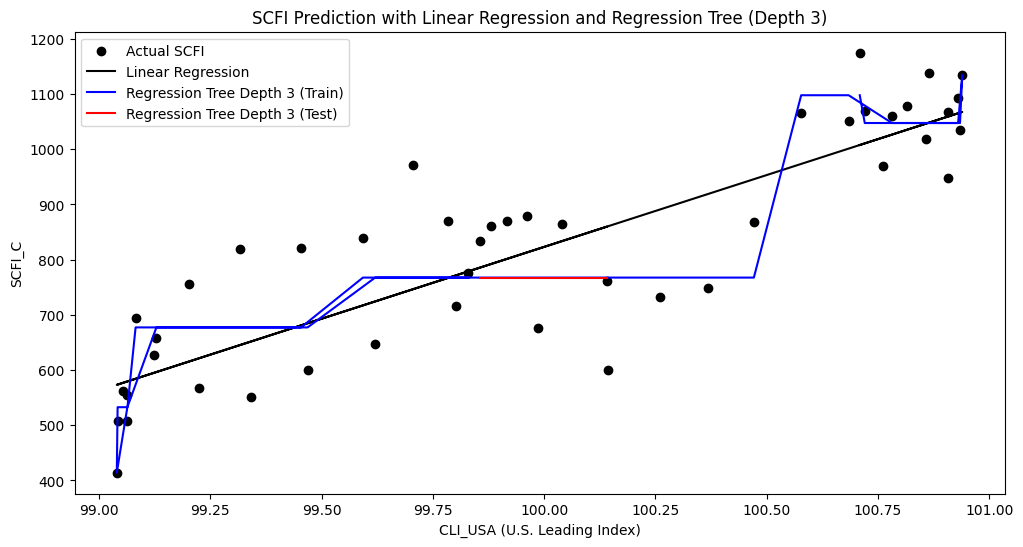

In [53]:
# 회귀트리 모델을 깊이 3으로 설정하여 다시 구축
regressor_depth_3 = DecisionTreeRegressor(max_depth=3)
regressor_depth_3.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test_depth_3 = regressor_depth_3.predict(X_test)

# 훈련 데이터에 대한 예측
y_pred_train_depth_3 = regressor_depth_3.predict(X_train)

# 전체 데이터에 대한 선형회귀 예측
y_pred_total_linear = linear_regressor.predict(data_cleaned.drop('SCFI_C', axis=1))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# SCFI 실적
plt.scatter(data_cleaned['CLI_USA'], data_cleaned['SCFI_C'], color='black', label='Actual SCFI')

# 선형회귀선
plt.plot(data_cleaned['CLI_USA'], y_pred_total_linear, 'k-', label='Linear Regression')

# 회귀트리로 예측한 훈련 데이터 (깊이 3)
plt.plot(X_train['CLI_USA'], y_pred_train_depth_3, 'b-', label='Regression Tree Depth 3 (Train)')

# 회귀트리로 예측한 테스트 데이터 (깊이 3)
plt.plot(X_test['CLI_USA'], y_pred_test_depth_3, 'r-', label='Regression Tree Depth 3 (Test)')

# 그래프 설정
plt.xlabel("CLI_USA (U.S. Leading Index)")
plt.ylabel("SCFI_C")
plt.title("SCFI Prediction with Linear Regression and Regression Tree (Depth 3)")
plt.legend()
plt.show()


In [54]:
# 테스트 데이터에 대한 예측

# RMSE 계산
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_test_depth_3))
rmse_3

87.10113488335467

# **도표 19-8. 파라미터 튜닝한 의사결정나무 생성 및 평가 파이썬코드**

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [2, 3, 4, 5],  # DecisionTreeRegressor의 트리 최대 깊이 설정
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드가 되기 위한 최소 샘플 수
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
# DecisionTreeRegressor 모델 사용, 5-fold 교차 검증, 평가 기준은 음의 평균 제곱 오차 사용
regressor_gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
regressor_gs.fit(X_train, y_train)  # 모델 훈련

# 최적의 하이퍼파라미터 출력
best_params = regressor_gs.best_params_
print(best_params)

y_pred_regressor_gs = regressor_gs.predict(X_test)   # 테스트 데이터에 대한 예측 수행

# RMSE 계산 : 실제값과 예측값의 차이의 제곱근을 통해 모델의 예측 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred_regressor_gs))
print("RMSE: ", rmse)

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE:  124.56850358494856


# 도표 19-7. 하이퍼파라미터 튜닝한 의사결정나무의 예측결과 그래프와 구조 시각화

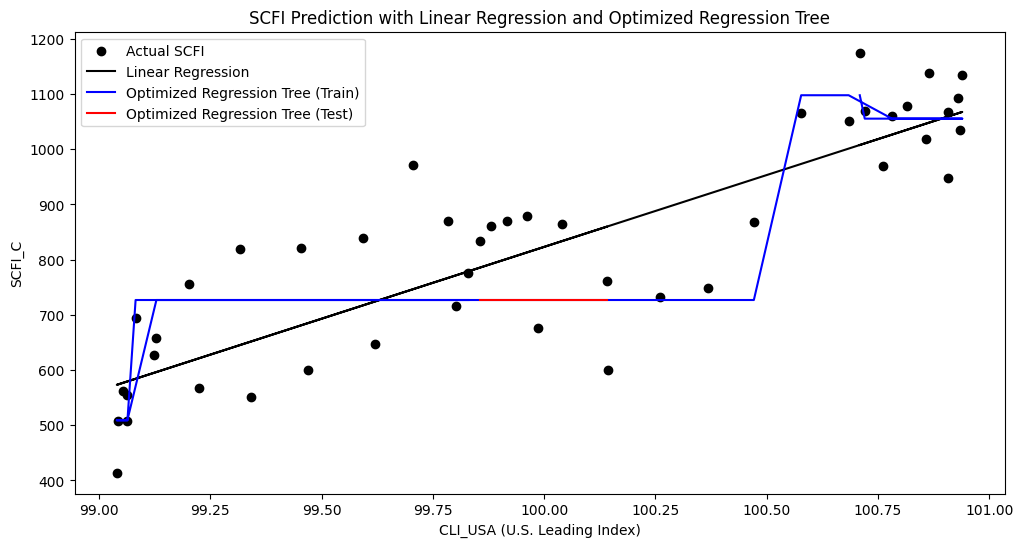

In [56]:
# 최적의 하이퍼파라미터로 회귀트리 모델 생성 및 훈련
regressor_optimized = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                             min_samples_split=best_params['min_samples_split'],
                                             min_samples_leaf=best_params['min_samples_leaf'])
regressor_optimized.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_test_optimized = regressor_optimized.predict(X_test)

# 훈련 데이터에 대한 예측
y_pred_train_optimized = regressor_optimized.predict(X_train)

# 전체 데이터에 대한 선형회귀 예측
y_pred_total_linear = linear_regressor.predict(data_cleaned.drop('SCFI_C', axis=1))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# SCFI 실적
plt.scatter(data_cleaned['CLI_USA'], data_cleaned['SCFI_C'], color='black', label='Actual SCFI')

# 선형회귀선
plt.plot(data_cleaned['CLI_USA'], y_pred_total_linear, 'k-', label='Linear Regression')

# 최적화된 회귀트리로 예측한 훈련 데이터
plt.plot(X_train['CLI_USA'], y_pred_train_optimized, 'b-', label='Optimized Regression Tree (Train)')

# 최적화된 회귀트리로 예측한 테스트 데이터
plt.plot(X_test['CLI_USA'], y_pred_test_optimized, 'r-', label='Optimized Regression Tree (Test)')

# 그래프 설정
plt.xlabel("CLI_USA (U.S. Leading Index)")
plt.ylabel("SCFI_C")
plt.title("SCFI Prediction with Linear Regression and Optimized Regression Tree")
plt.legend()
plt.show()


In [57]:
y_pred_test_optimized

array([726.7094, 726.7094, 726.7094, 726.7094, 726.7094, 726.7094])

In [58]:
y_test

39    834.060
40    860.922
41    869.764
42    878.540
43    864.205
44    760.540
Name: SCFI_C, dtype: float64

In [59]:
# 재훈련후 TEST RMSE 계산 : 관측치와 예측치의 차이의 제곱근을 통해 모델의 예측 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_optimized))
print(" TEST DATA RMSE: ", rmse)

 TEST DATA RMSE:  124.56850358494856
